Time    Converted Concentration
0        122.43
120      95.46
240      73.66
360      54.58
480      39.45
600      27.57
720      19.15
840      13.70
960      9.74
1080     7.54
1200     6.12
1320     5.17
1440     4.56
1560     4.12
1680     3.82
1800     3.61
1920     2.89
2040     2.89
2160     2.89
2280     2.89
2400     2.89
2520     2.89
2640     2.89
2760     2.89
2880     2.89
3000     2.89
3120     2.89
3240     2.89
3360     2.89
3480     2.89
3600     2.89


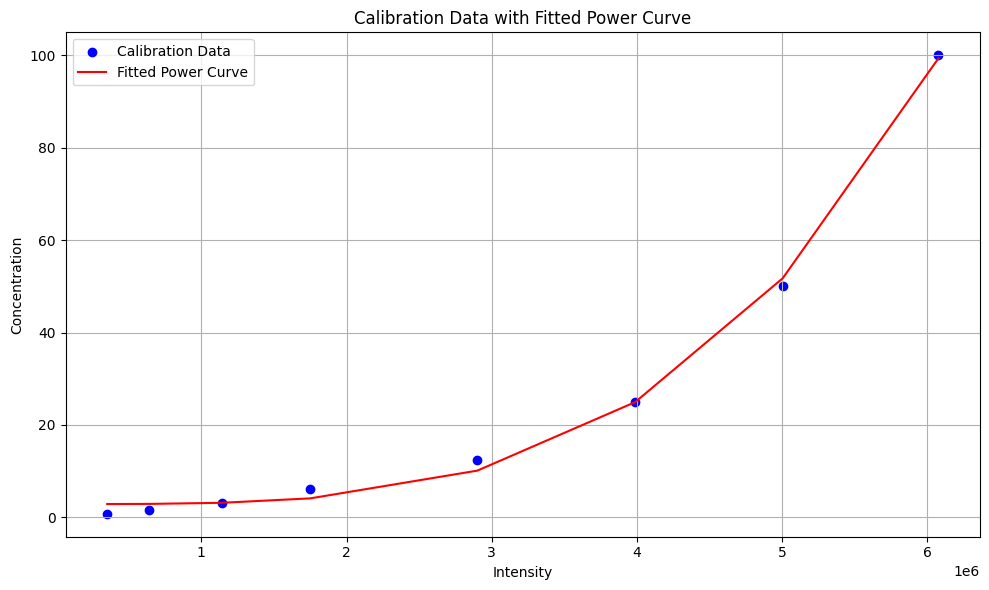

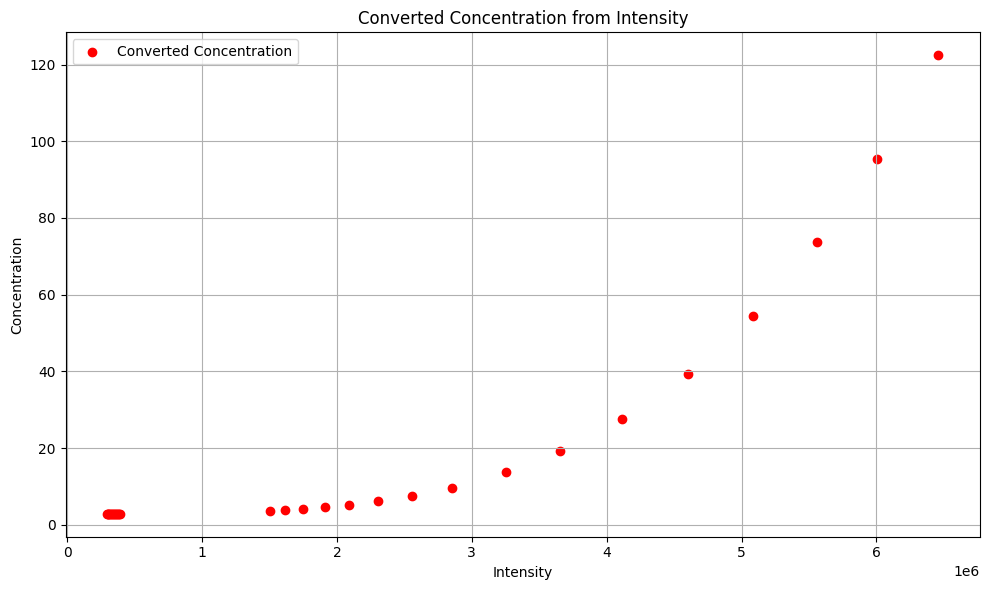

In [ ]:
#This code fits a power function to calibration data to convert intensity values into 
# concentrations and visualizes the results.

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Concentration/Intensity data
concentration_intensity_data = np.array([
    [100, 6076286],
    [50, 5003354],
    [25, 3987367],
    [12.5, 2900409],
    [6.25, 1749406],
    [3.125, 1139807],
    [1.5625, 637610],
    [0.78125, 351567]
])

# Extracting concentration and intensity from the calibration data
calibrated_concentration = concentration_intensity_data[:, 0]
calibrated_intensity = concentration_intensity_data[:, 1]

# Define the power function to fit to the data
def power_function(intensity, a, b, c):
    return a * np.power(intensity, b) + c

# Perform curve fitting
popt, pcov = curve_fit(power_function, calibrated_intensity, calibrated_concentration, maxfev=5000)

# Generate a calibration curve using the fitted parameters
def fitted_power_curve(intensity):
    return power_function(intensity, *popt)

# Given Intensity data
given_intensity_data = np.array([
    6460108, 6005427, 5562299, 5085100, 4606530, 4117386, 3655068, 3253062, 2855893, 2557846,
    2304315, 2087972, 1910872, 1751137, 1618512, 1504301, 390296, 383905, 375747, 366471, 359555,
    351881, 345048, 338864, 333260, 326220, 319525, 312209, 306536, 301359, 297136
])

# Convert Intensity to Concentration using the fitted power curve
converted_concentration = fitted_power_curve(given_intensity_data)
# Ensure that the resulting concentrations are not negative
converted_concentration = np.where(converted_concentration < 0, 0, converted_concentration)

# Printing the resulting concentrations
print("Time    Converted Concentration")
for time, concentration in zip(range(0, 9001, 120), converted_concentration):
    print(f"{time:<8} {concentration:.2f}")

# Plotting the calibration data with the fitted power curve
plt.figure(figsize=(10, 6))
plt.scatter(calibrated_intensity, calibrated_concentration, color='blue', label='Calibration Data')
plt.plot(calibrated_intensity, fitted_power_curve(calibrated_intensity), color='red', label='Fitted Power Curve')
plt.xlabel('Intensity')
plt.ylabel('Concentration')
plt.title('Calibration Data with Fitted Power Curve')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(given_intensity_data, converted_concentration, color='red', label='Converted Concentration')
plt.xlabel('Intensity')
plt.ylabel('Concentration')
plt.title('Converted Concentration from Intensity')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
